In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [62]:
train = pd.read_csv("/Users/abhishekwaghchaure/Desktop/Datasets/titanic/train.csv")
test = pd.read_csv("/Users/abhishekwaghchaure/Desktop/Datasets/titanic/test.csv")

In [63]:
df = pd.concat([train,test]).sample(1309)

In [64]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
848,849,0.0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.0000,NaN,S
148,1040,NaN,1,"Crafton, Mr. John Bertram",male,NaN,0,0,113791,26.5500,NaN,S
161,162,1.0,2,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",female,40.0,0,0,C.A. 33595,15.7500,NaN,S
230,231,1.0,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.0,1,0,36973,83.4750,C83,S
223,1115,NaN,3,"Karlsson, Mr. Einar Gervasius",male,21.0,0,0,350053,7.7958,NaN,S


In [65]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [66]:
population_age = df['Age'].dropna()
print(population_age.shape)

(1046,)


In [67]:
sample_age = population_age.sample(25).to_numpy()
print(type(sample_age))

<class 'numpy.ndarray'>


In [68]:
sample_age

array([48.,  4., 21., 20., 47., 35., 53., 43., 18., 35., 22., 33., 45.,
       51.,  3.,  5., 29., 49., 25.,  7., 23., 30., 39., 31., 48.])

* (H0) -> Null hypothesis is that the mean age is 35
* (H1) -> Alternate hypothesis is that the mean age < 35

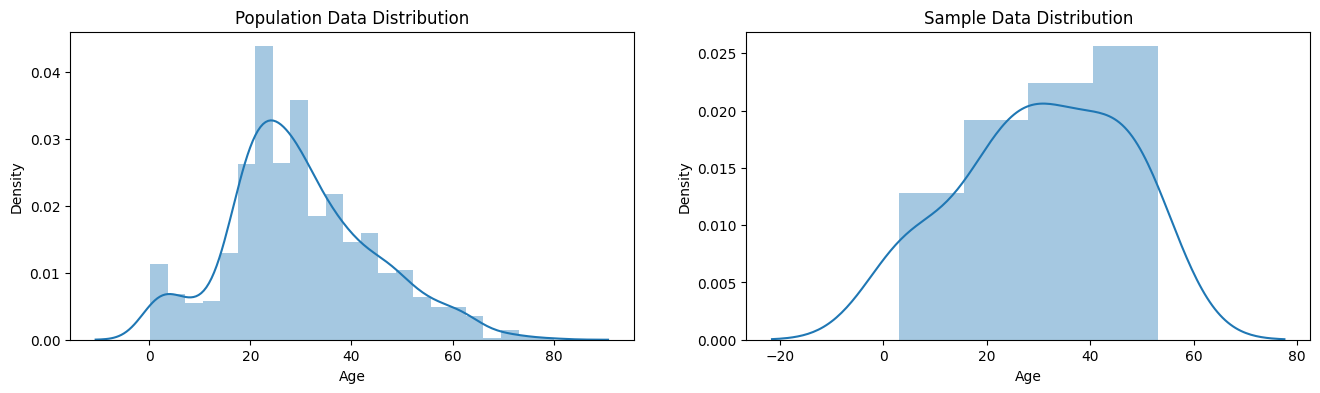

In [69]:
plt.figure(figsize=(16,4))
plt.subplot(121)
sns.distplot(population_age)
plt.title('Population Data Distribution')
plt.subplot(122)
sns.distplot(sample_age)
plt.title('Sample Data Distribution')
plt.xlabel('Age')

plt.show()

### alpha value significancee value given is 0.05

## Check if the sample is normal distribution or not by shapiro wilk test
* As the sample size is less than 30 so CLT will not apply and will have to test explicitly for normality
* if the p value > 0.05 -> Normal
* if p value < 0.05 -> not Normal

In [70]:
from scipy.stats import shapiro
shapiro_age = shapiro(sample_age)
print(shapiro_age)


ShapiroResult(statistic=0.9379710277091668, pvalue=0.13287508759211183)


### As p value > 0.05 ---- the age sample is normal

In [71]:
import scipy.stats as stats
population_mean = 35

t_statistic, p_value = stats.ttest_1samp(sample_age, population_mean)

print(f"T Statistic Value is : {t_statistic}")
print(f"P Values is : {p_value/2}")
 

T Statistic Value is : -1.4258234896533792
P Values is : 0.08339868890899216


In [72]:
alpha = 0.05

if p_value > alpha:
    print('Reject the null Hypothesis')
else:
    print("Null Hypothesis accepted")

Reject the null Hypothesis
